# Classification Basics

Classification is one of the most useful and popular functions in data mining and machine learning. 

Essentially, classificaiton is aimed at building a **prediction model** that can assign data points to a set of **predefined classes**, i.e., giving a class label to each data point. 

There are several key concepts related to classification: 
- **Prediction model**: There is a specific target to predict. 
- **Class label**: the target variable is qualitative/categorical.
- **Predefined classes**: unlike clustering, classification has predefined classes. 
    - Binary classification: 2 classes (Yes vs. No, True vs. False, Positive vs. Negative)
    - Multi-class classification: 3 or more classes
- **Supervised learning**: the predefined classes supervise the learning process.
- **Learning what?** 
    - The **function** between predictors X and class label L. 
    - F(X) -> L
- **Learning from what?**
    - **Training set**: $(X_{train}, L_{train})$
    - $X_{train}$: predictor variables of data points in the training set
    - $L_{train}$: class labels of data points in the training set
- **How accurate is the model?**
    - **Test set**: $(X_{test}, L_{test})$ 
    - $X_{test}$: predictor variables of data points in the test set
    - Apply the model to $X_{test}$ and output $L'_{test}$, **predicted** labels. 
    - $L_{test}$: **actual** labels of data points in the test set, hidden from the model
    - Evaluation by comparing $L_{test}$ and $L'_{test}$
- **Evaluation metrics**: 
    - Accuracy: 0~100%
    - Error rate: 1-accuracy
    - Confusion matrix: 
        - Type I error: false positives (FP)
        - Type II error: false negatives (FN)
    - Sensitivity, specificity, precision, recall, F-measure, AUC...

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Titanic Data 

We will use the famous Titanic data to illustrate the process of classificaiton. 

In [3]:
# Load the training set
df_train = pd.read_csv('../data/titanic_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df_train['Survived'].value_counts()
print(s)
print(f'the survival rate is {s[1]/s.sum():.1%}')

0    549
1    342
Name: Survived, dtype: int64
the survival rate is 38.4%


In [5]:
s_norm = df_train['Survived'].value_counts(normalize=True)
s_norm

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## A Naive Prediction Model

Simply based on the overall survival rate (38.4%), we could build a naive prediction model: 
- Survived = 0 (dead) for all

Let's apply this model to the test set. 

In [6]:
df_test = pd.read_csv('../data/titanic_test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# predict survived = 0 (dead) for all because survival rate is 38.4%
df_test['Survived'] = 0
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [7]:
# Select the two columns and save to a .csv file for submission
df_submit_allzero = df_test[['PassengerId', 'Survived']]
# Set index=False to exclude the index column
df_submit_allzero.to_csv('../data/titanic_submit_allzero.csv', index=False)

Submit this file "titanic_submit_allzero.csv" to Kaggle. Check your score and ranking. 

Can we do better than this? 

In [8]:
# Consider Sex as a predictor variable
group = df_train.groupby('Sex')['Survived'].value_counts()
print(group.index)
group

MultiIndex([('female', 1),
            ('female', 0),
            (  'male', 0),
            (  'male', 1)],
           names=['Sex', 'Survived'])


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [9]:
print(f'female survival rate: {group["female", 1]/group["female"].sum():.1%}')
print(f'male survival rate: {group["male", 1]/group["male"].sum():.1%}')

female survival rate: 74.2%
male survival rate: 18.9%


In [7]:
# another (easier) way to calculate the survival rates by gender
group_norm = df_train.groupby('Sex')['Survived'].value_counts(normalize=True)
group_norm

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

## Another Simple Prediciton Model

Since female survival rate is 74.2% and male survival rate is 18.9%, we could build another simple prediction model: 
- Survived = 0 (dead) for male 
- Survived = 1 (survived) for female

In [11]:
# predict survived = 0 (dead) for male and survived = 1 (survived) for female 
# because female has a higher survival rate (74.2%) than male (18.9%)
df_test['Survived_Gender'] = df_test['Sex'].apply(lambda x: 0 if x=='male' else 1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Survived_Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1


In [12]:
df_submit_gender = df_test[['PassengerId', 'Survived_Gender']]
# change column name to 'Survived' for Kaggle submission
df_submit_gender.to_csv('../data/titanic_submit_gender.csv', index=False, header=['PassengerId', 'Survived']) 

Submit this file "titanic_submit_gender.csv" to Kaggle. Check your score and ranking. 

## Decision Tree for the Titanic Data

A decision tree is a prediction model that uses a tree-like structure of decisions and their possible consequences. It can be used for classificaiton and regression. 

The basic idea of a decision tree is to split data set based on the homogeneity of data, i.e., reducing “impurity”. 

### Entropy

Entropy is one of the most common measures for calculating impurity.

$H(x)=-\sum_{i=1}^np_{i}\log p_{i}$, where $p_{i}$ is the probability of class $i$ in the data.

In [13]:
# Entropy for a collection of 30 balls with 15 red and 15 blue
# Entropy = 1     i.e., maximal impurity 
e1 = -15/30*np.log2(15/30)-15/30*np.log2(15/30)
e1

1.0

In [14]:
# Entropy for a collection of 30 balls with 2 red and 28 blue
e2 = -2/30*np.log2(2/30)-28/30*np.log2(28/30)
e2

0.35335933502142136

In [15]:
# Entropy for a collection of 30 balls with 0 red and 30 blue
# Entropy = 0     i.e., maximal purity 
e3 = -np.log2(30/30)
e3

-0.0

In [16]:
# Define a function to caculate entropy
# input: a list of values that represents ratio of different classes, e.g., (1,2,3,4)
def entropy(ratio):
    h = None
    s = 0
    for i in ratio:
        s += i
    if s>0:
        h = 0
        for i in ratio: 
            if i>0:
                h += -i/s*np.log2(i/s)
    return h

In [17]:
r = input('Please enter the ratio in format 1:2:3 : ')
ratio = [int(i) for i in r.split(':')]
entropy(ratio)

Please enter the ratio in format 1:2:3 : 2:3


0.9709505944546686

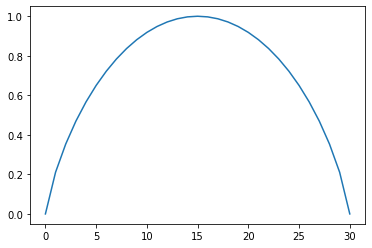

In [18]:
fig = plt.figure()
ax = plt.axes()
x = np.arange(0, 31, 1) # return numbers [0,1,2,...,30]
e = pd.Series([entropy([i,30-i]) for i in x])
ax.plot(x, e)

## scikit-learn

Scikit-learn is one of the mose popular Python packages for predictive data analysis. 

https://scikit-learn.org/

We will use sklearn for building decision trees. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# sklearn decision tree only accept inputs in float data type without null values
# we will learn data processing and transformation later to handle null values and non-numerical features
# thus, we choose three numerical values to train the tree classifier
# pclass: Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
# sibsp: of siblings / spouses aboard the Titanic
# fare: Passenger fare

X = df_train[['Pclass', 'SibSp', 'Fare']]
y = df_train['Survived']
print(X.shape)
print(y.shape)


(891, 3)
(891,)


In [10]:
# Train a DT model by using all default settings. 
# The default criterion='gini', not 'entropy'. 
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

In [13]:
# For visulizing the tree
# This may require you installing a package called "graphviz" as well.
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [14]:
# get feature and class names for visualization
print(X.columns.values.tolist())
print(y.unique().tolist())
cls_names = ['died' if i == 0 else 'survived' for i in y.unique().tolist()] # convert to string for class names
cls_names

['Pclass', 'SibSp', 'Fare']
[0, 1]


['died', 'survived']

In [15]:
# Create DOT data
dot_data = tree.export_graphviz(tree_clf, 
                                feature_names=X.columns.values.tolist(),  
                                class_names=cls_names, 
                               )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

You can see this is a huge tree, which may lead to *overfitting* problem. 

Let's set max_depth=3 to generate a simpler tree. Also, set criterion='entropy'.

In [28]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)  
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
# Create DOT data
dot_data = tree.export_graphviz(tree_clf, 
                                feature_names=X.columns.values.tolist(),  
                                class_names=cls_names,
                               )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### About Each Node
- First line, such as Pclass<=2.5: the tree is splitted based on the true or false of the condition Pclass<=2.5
- Second line, such as entropy=0.961: the current entropy of the node
- Third line, such as samples = 891: the total number of samples in this node
- Fourth line, such as value = [549, 342]: how many samples belong to each class, 549 belong to class 0 (died) and 342 belong to class 1 (survived)
- Last line, such as class = died: this shows the prediction a given node will make and the class occurs the most within the node will be selected as the class prediction.

### Make Predictions

Remember the training data has three features ['Pclass', 'SibSp', 'Fare'], we can predict the target based on different values for those three features

In [16]:
# passenger 1 who bought a class 3 ticket at $8.5 with no siblings / spouses, Jack ? 
# passenger 2 who bought a first class ticket at $88 with no siblings / spouses, Rose ?
passenger1 = tree_clf.predict([[3, 0, 8.5]])
passenger2 = tree_clf.predict([[1, 0, 88]])

print(passenger1, passenger2)

[1] [1]


Next, we use this simple DT to predict for the test set. 

In [17]:
# choose the subset of the test set
# there is a null value in Fare
X_test = df_test[['Pclass', 'SibSp', 'Fare']]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   SibSp   418 non-null    int64  
 2   Fare    417 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [32]:
# fill the null value with mean
X_test = X_test.fillna(X_test.mean())
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   SibSp   418 non-null    int64  
 2   Fare    418 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.9 KB


In [33]:
y_hat = tree_clf.predict(X_test)
y_hat

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [34]:
# combine the final dataframe
df_submit_simpleDT = pd.DataFrame({
                                    'PassengerId': df_test['PassengerId'], 
                                    'Survived': y_hat,
                                  })
df_submit_simpleDT.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [35]:
df_submit_simpleDT.to_csv('../data/titanic_submit_simpleDT.csv', index=False) 

Submit this file "titanic_submit_simpleDT.csv" to Kaggle. Check your score and ranking.